In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from umap import UMAP
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]

In [6]:
from os import listdir
from os.path import isfile, join
from pathlib import Path
from functools import reduce

In [7]:
potDoSpektrov = Path(r'D:\magistrska_spektri\normalized_spectra_R20000\T_03500')

In [ ]:
def poisciLastnosti(imeDatoteke):
    

In [16]:
i = 0
vrstice = 30
stolpci = 30
posamezni_dfji = []
Teff = []
grav = []
metal = []
for file in listdir(potDoSpektrov):
    if not 'V000K2SNWNVR20N' in file:
        continue
    elif i > stolpci:
        break
    else:
        Teff.append()
        print(file)
      # posamezni_dfji.append(pd.read_csv(str(potDoSpektrov) + '\\' + file).head(vrstice))
        posamezni_dfji.append(pd.read_csv(str(potDoSpektrov) + '\\' + file))
        i = i + 1
    
df_zdruzeniSpektri = pd.concat(posamezni_dfji, axis=1).T

T03500G00M05V000K2SNWNVR20N.ASC
T03500G00M10V000K2SNWNVR20N.ASC
T03500G00M15V000K2SNWNVR20N.ASC
T03500G00M20V000K2SNWNVR20N.ASC
T03500G00M25V000K2SNWNVR20N.ASC
T03500G00P00V000K2SNWNVR20N.ASC
T03500G00P05V000K2SNWNVR20N.ASC
T03500G05M05V000K2SNWNVR20N.ASC
T03500G05M10V000K2SNWNVR20N.ASC
T03500G05M15V000K2SNWNVR20N.ASC
T03500G05M20V000K2SNWNVR20N.ASC
T03500G05M25V000K2SNWNVR20N.ASC
T03500G05P00V000K2SNWNVR20N.ASC
T03500G05P05V000K2SNWNVR20N.ASC
T03500G10M05V000K2SNWNVR20N.ASC
T03500G10M10V000K2SNWNVR20N.ASC
T03500G10M15V000K2SNWNVR20N.ASC
T03500G10M20V000K2SNWNVR20N.ASC
T03500G10M25V000K2SNWNVR20N.ASC
T03500G10P00V000K2SNWNVR20N.ASC
T03500G10P05V000K2SNWNVR20N.ASC
T03500G15M05V000K2SNWNVR20N.ASC
T03500G15M10V000K2SNWNVR20N.ASC
T03500G15M15V000K2SNWNVR20N.ASC
T03500G15M20V000K2SNWNVR20N.ASC
T03500G15M25V000K2SNWNVR20N.ASC
T03500G15P00V000K2SNWNVR20N.ASC
T03500G15P05V000K2SNWNVR20N.ASC
T03500G20M05V000K2SNWNVR20N.ASC
T03500G20M10V000K2SNWNVR20N.ASC
T03500G20M15V000K2SNWNVR20N.ASC


In [9]:
model = UMAP(n_neighbors = 15, min_dist = 0.25, n_components = 2, verbose = True, init='spectral', random_state=42)
umap = model.fit_transform(df_zdruzeniSpektri)

UMAP(min_dist=0.25, random_state=42, verbose=True)
Sun Jan 15 23:24:52 2023 Construct fuzzy simplicial set
Sun Jan 15 23:25:28 2023 Finding Nearest Neighbors
Sun Jan 15 23:25:31 2023 Finished Nearest Neighbor Search
Sun Jan 15 23:25:34 2023 Construct embedding



Sun Jan 15 23:25:37 2023 Finished embedding


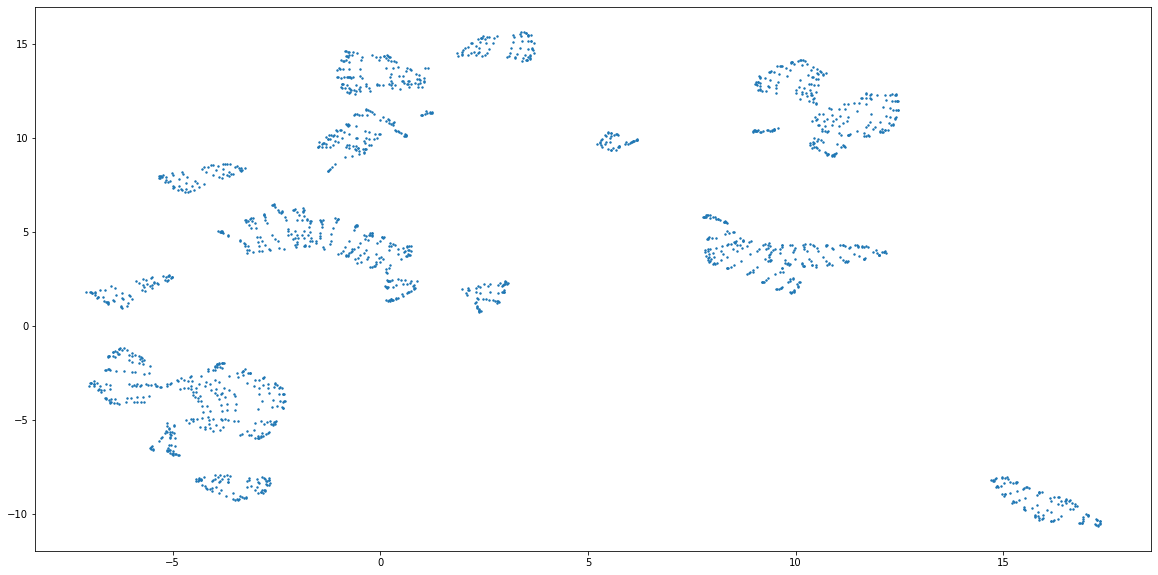

In [15]:
plt.scatter(umap[:, 0], umap[:, 1], cmap = 'tab10', s = 2)

plt.show()